In [ ]:
%pip install langchain langgraph langchain_community langchain_google_genai

In [2]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import List, Dict
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
import os

g:\GDSC_AI_Agents\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from dotenv import load_dotenv
load_dotenv() 
gemini_api_key = os.getenv('GEMINI_API_KEY')
gemini_api_key2 = os.getenv('GEMINI_API_KEY_2')
gemini_api_key3 = os.getenv('GEMINI_API_KEY_3')
gemini_api_key4 = os.getenv('GEMINI_API_KEY_4')
gemini_api_key5 = os.getenv('GEMINI_API_KEY_5')

In [306]:
MODELS = [
    {
        "name": "gemini-1.5-flash-8b",
        "api_key": gemini_api_key,
        "task": f"Inspect the code for vulnerabilities in XML processing and API configurations. Look for XML External Entity (XXE) attacks, insecure API usage, and Security Misconfigurations. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"agent\":\"XML and API Agent\",\"findings\":[{{\"vulnerability_type\":\"XML External Entity (XXE)\",\"file\":\"parser.py\",\"line_number\":22,\"code_snippet\":\"etree.parse(user_input)\",\"recommendation\":\"Disable external entity resolution when processing XML files.\"}},{{\"vulnerability_type\":\"API Misuse\",\"file\":\"api_handler.py\",\"line_number\":48,\"code_snippet\":\"response = requests.post(api_url, data=user_data)\",\"recommendation\":\"Use secure authentication and validate API responses.\"}}]}}"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key2,
        "task": f"Analyze the code for access control vulnerabilities. Look for Insecure Direct Object References (IDOR), Host Header Injection, and Subdomain Takeover risks. Identify instances where access control mechanisms are improperly implemented. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed.Required output structure {{\"agent\":\"Access Control Agent\",\"findings\":[{{\"vulnerability_type\":\"Insecure Direct Object Reference (IDOR)\",\"file\":\"routes.py\",\"line_number\":12,\"code_snippet\":\"GET /user/123\",\"recommendation\":\"Implement access controls to verify the requester is authorized to access the resource.\"}},{{\"vulnerability_type\":\"Host Header Injection\",\"file\":\"server.py\",\"line_number\":55,\"code_snippet\":\"url = request.headers['Host'] + '/login'\",\"recommendation\":\"Validate and sanitize the Host header to prevent injection attacks.\"}}]}}"
    },
    {
        "name": "gemini-1.5-flash-8b",
        "api_key": gemini_api_key3,
        "task": f"Scan the code for vulnerabilities related to file access. Detect instances of Path Traversal, Local File Inclusion (LFI), and Remote File Inclusion (RFI). Focus on functions that handle file paths or include external files. Provide the output STRICTLY in the specified structureONLY, no markdown or other text needed. Required output structure {{\"agent\":\"File Access Agent\",\"findings\":[{{\"vulnerability_type\":\"Path Traversal\",\"file\":\"file_handler.py\",\"line_number\":18,\"code_snippet\":\"open('../../etc/passwd', 'r')\",\"recommendation\":\"Validate file paths and restrict access to specific directories.\"}},{{\"vulnerability_type\":\"Local File Inclusion (LFI)\",\"file\":\"app.py\",\"line_number\":30,\"code_snippet\":\"exec(open(user_input).read())\",\"recommendation\":\"Ensure user input is validated and does not reference sensitive files.\"}}]}}"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key4,
        "task": f"Examine the code for client-side vulnerabilities. Specifically, identify potential Cross-Site Scripting (XSS), Clickjacking, and Content Spoofing issues. Look for improper handling of user-generated content or unsafe rendering practices. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"agent\":\"Client-Side Vulnerability Agent\",\"findings\":[{{\"vulnerability_type\":\"Cross-Site Scripting (XSS)\",\"file\":\"templates/home.html\",\"line_number\":8,\"code_snippet\":\"{{{{ user_input }}}}\",\"recommendation\":\"Escape or sanitize user-generated content before rendering.\"}},{{\"vulnerability_type\":\"Clickjacking\",\"file\":\"middleware.py\",\"line_number\":20,\"code_snippet\":\"response.headers['X-Frame-Options'] = 'ALLOW'\",\"recommendation\":\"Set 'X-Frame-Options' to 'DENY' or 'SAMEORIGIN' to prevent clickjacking.\"}}]}}"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key5,
        "task": f"Analyze the provided code for vulnerabilities related to user input handling. Specifically, detect cases where user input is directly passed into SQL queries, system commands, or dynamic code execution without validation or sanitization. Focus on identifying potential SQL Injection, Command Injection, and Code Injection vulnerabilities. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"agent\":\"Input Injection Agent\",\"findings\":[{{\"vulnerability_type\":\"SQL Injection\",\"file\":\"example.py\",\"line_number\":15,\"code_snippet\":\"cursor.execute('SELECT * FROM users WHERE id = ' + user_input)\",\"recommendation\":\"Use parameterized queries to prevent SQL injection.\"}},{{\"vulnerability_type\":\"Command Injection\",\"file\":\"main.py\",\"line_number\":42,\"code_snippet\":\"os.system('ping ' + user_input)\",\"recommendation\":\"Validate and sanitize user input before passing it to system commands.\"}}]}}"
    }
]

In [4]:
MODELS = [
    {
        "name": "gemini-1.5-flash-8b",
        "api_key": gemini_api_key,
        "task": f"Inspect the code for vulnerabilities in XML processing and API configurations. Look for XML External Entity (XXE) attacks, insecure API usage, and Security Misconfigurations. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"findings\":[{{\"vulnerability_type\":\"XML External Entity (XXE)\",\"code_snippet\":\"etree.parse(user_input)\",\"recommendation\":\"Disable external entity resolution when processing XML files.\"}},{{\"vulnerability_type\":\"API Misuse\",\"code_snippet\":\"response = requests.post(api_url, data=user_data)\",\"recommendation\":\"Use secure authentication and validate API responses.\"}}]}}. In case no vulnerability found return findings empty"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key2,
        "task": f"Analyze the code for access control vulnerabilities. Look for Insecure Direct Object References (IDOR), Host Header Injection, and Subdomain Takeover risks. Identify instances where access control mechanisms are improperly implemented. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"findings\":[{{\"vulnerability_type\":\"Insecure Direct Object Reference (IDOR)\",\"code_snippet\":\"GET /user/123\",\"recommendation\":\"Implement access controls to verify the requester is authorized to access the resource.\"}},{{\"vulnerability_type\":\"Host Header Injection\",\"code_snippet\":\"url = request.headers['Host'] + '/login'\",\"recommendation\":\"Validate and sanitize the Host header to prevent injection attacks.\"}}]}}. In case no vulnerability found return findings empty"
    },
    {
        "name": "gemini-1.5-flash-8b",
        "api_key": gemini_api_key3,
        "task": f"Scan the code for vulnerabilities related to file access. Detect instances of Path Traversal, Local File Inclusion (LFI), and Remote File Inclusion (RFI). Focus on functions that handle file paths or include external files. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"findings\":[{{\"vulnerability_type\":\"Path Traversal\",\"code_snippet\":\"open('../../etc/passwd', 'r')\",\"recommendation\":\"Validate file paths and restrict access to specific directories.\"}},{{\"vulnerability_type\":\"Local File Inclusion (LFI)\",\"code_snippet\":\"exec(open(user_input).read())\",\"recommendation\":\"Ensure user input is validated and does not reference sensitive files.\"}}]}}. In case no vulnerability found return findings empty"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key4,
        "task": f"Examine the code for client-side vulnerabilities. Specifically, identify potential Cross-Site Scripting (XSS), Clickjacking, and Content Spoofing issues. Look for improper handling of user-generated content or unsafe rendering practices. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"findings\":[{{\"vulnerability_type\":\"Cross-Site Scripting (XSS)\",\"code_snippet\":\"{{{{ user_input }}}}\",\"recommendation\":\"Escape or sanitize user-generated content before rendering.\"}},{{\"vulnerability_type\":\"Clickjacking\",\"code_snippet\":\"response.headers['X-Frame-Options'] = 'ALLOW'\",\"recommendation\":\"Set 'X-Frame-Options' to 'DENY' or 'SAMEORIGIN' to prevent clickjacking.\"}}]}}. In case no vulnerability found return findings empty"
    },
    {
        "name": "gemini-1.5-flash",
        "api_key": gemini_api_key5,
        "task": f"Analyze the provided code for vulnerabilities related to user input handling. Specifically, detect cases where user input is directly passed into SQL queries, system commands, or dynamic code execution without validation or sanitization. Focus on identifying potential SQL Injection, Command Injection, and Code Injection vulnerabilities. Provide the output STRICTLY in the specified structure ONLY, no markdown or other text needed. Required output structure {{\"findings\":[{{\"vulnerability_type\":\"SQL Injection\",\"code_snippet\":\"cursor.execute('SELECT * FROM users WHERE id = ' + user_input)\",\"recommendation\":\"Use parameterized queries to prevent SQL injection.\"}},{{\"vulnerability_type\":\"Command Injection\",\"code_snippet\":\"os.system('ping ' + user_input)\",\"recommendation\":\"Validate and sanitize user input before passing it to system commands.\"}}]}}. In case no vulnerability found return findings empty"
    }
]

In [5]:
class GraphState(TypedDict):
    input_text: str
    results: List[Dict]

In [ ]:
def analyze_text(state: GraphState) -> GraphState:
    results = []
    x = 1
    for model_info in MODELS:
        model = ChatGoogleGenerativeAI(
            model=model_info["name"], google_api_key=model_info["api_key"]
        )

        response = model.invoke(
            f"Task: {model_info['task']}\nAnalyze the following input:\n{state['input_text']}"
        )
        results.append({"output": response})
        print(f"Agent {x} completed!")
        x += 1
    print("\n")
    state["results"] = results
    return state

def merge_results(state: GraphState) -> Dict:
    findings = state.get("results", [])
    final_report = {
        "findings": findings
    }
    return final_report

In [7]:
graph = StateGraph(GraphState)
graph.add_node("analyze", analyze_text)
graph.add_node("merge", merge_results)
graph.set_entry_point("analyze")
graph.add_edge("analyze", "merge")
app = graph.compile()

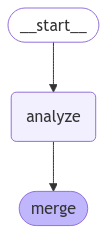

In [8]:
from IPython.display import display, Image
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except:
    pass

In [347]:
code_to_analyze = """
from flask import Flask, request, jsonify

app = Flask(__name__)

# Hardcoded secret API key (for demonstration purposes)
SECRET_API_KEY = "SuperSecretKey123!"

# Route to validate the API key
@app.route('/validate', methods=['POST'])
def validate():
    # Get the API key from the request
    provided_key = request.form.get('api_key')
    if not provided_key:
        return jsonify({"error": "API key missing"}), 400

    # Vulnerable comparison of API keys
    if provided_key == SECRET_API_KEY:
        return jsonify({"message": "Access granted"}), 200
    else:
        return jsonify({"error": "Invalid API key"}), 403


if __name__ == '__main__':
    app.run(debug=True)

"""
inputs = {"input_text": code_to_analyze}

# Run the graph
try:
    result = app.invoke(inputs)
except Exception as e:
    print(f"Error: {e}")


Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!
Agent 5 completed!




In [9]:
import json
import re

def extract_json(target):
    
    json_pattern = r'\{(?:[^{}]|(?:\{[^{}]*\}))*\}' #r"```json\n(.*?)\n```"
    json_matches = re.findall(json_pattern, target, re.DOTALL)

    extracted_jsons = []

    for match in json_matches:
        #print(match)
        try:
            json_data = json.loads(match)
            extracted_jsons.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Problematic JSON String: {match}")

    # for json_data in extracted_jsons:
    #     print(json_data)
    #     print('\n')
    return extracted_jsons


In [ ]:
import zipfile
import os

def analyze_zip_file(zip_file_path):
    all_findings = {}
    allowed_extensions = {'.py', '.js', '.ts', '.txt', '.json', '.jsx', '.tsx'}
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if not file_name.endswith('/') and os.path.splitext(file_name)[1].lower() in allowed_extensions:
                with zip_ref.open(file_name) as file:
                    file_content = file.read().decode('utf-8')
                print(file_name)
                try:
                    inputs = {"input_text": file_content}
                    result = app.invoke(inputs)
                    
                    #print(result)
                    findings = "".join(i['output'].content + '\n\n' for i in result['results'])
                    
                    all_findings[file_name] =  extract_json(findings)
                except Exception as e:
                    print(e)
                    return all_findings
    
    return all_findings

zip_file_path = 'test_files/test.zip'  
findings = analyze_zip_file(zip_file_path)

test/app.py
Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!
Agent 5 completed!


test/helper.py
Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Agent 5 completed!




In [375]:
findings

{'test/app.py': [{'findings': [{'vulnerability_type': 'API Misuse',
     'code_snippet': 'if provided_key == SECRET_API_KEY:',
     'recommendation': 'Do not hardcode API keys. Use environment variables or configuration files.'},
    {'vulnerability_type': 'API Misuse',
     'code_snippet': 'SECRET_API_KEY = "SuperSecretKey123!"',
     'recommendation': 'Do not hardcode API keys. Use environment variables or configuration files.'}]},
  {'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []}],
 'test/helper.py': [{'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': [{'vulnerability_type': 'Cross-Site Scripting (XSS)',
     'code_snippet': 'user_input',
     'recommendation': 'Escape or sanitize user-generated content before rendering.'}]},
  {'findings': []}]}

In [ ]:
import zipfile
import os
from collections import defaultdict

def analyze_zip_file(zip_file_path):
    all_findings = {}
    allowed_extensions = {'.py', '.js', '.ts', '.json', '.jsx', '.tsx'}
    folder_contents = defaultdict(str)
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if not file_name.endswith('/') and os.path.splitext(file_name)[1].lower() in allowed_extensions:
                folder_path = os.path.dirname(file_name)
                with zip_ref.open(file_name) as file:
                    file_content = file.read().decode('utf-8')
                
                folder_contents[folder_path] += f"--- {file_name} ---\n{file_content}\n\n"
    
    print(folder_contents.keys())
    for folder, merged_content in folder_contents.items():
        inputs = {"input_text": merged_content}
        try:
            result = app.invoke(inputs)
        
            findings = "".join(i['output'].content + '\n\n' for i in result['results'])
        
            all_findings[folder] = extract_json(findings)
        except Exception as e:
            print(e)
            return all_findings
    
    return all_findings

zip_file_path = 'test_files/src.zip'  
find2 = analyze_zip_file(zip_file_path)


dict_keys(['src', 'src/components', 'src/pages', 'src/types'])
Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!
Agent 5 completed!


Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Agent 5 completed!


Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!
Agent 5 completed!


Agent 1 completed!
Agent 2 completed!
Agent 3 completed!
Agent 4 completed!
Agent 5 completed!




In [11]:
find2

{'src': [{'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []}],
 'src/components': [{'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []}],
 'src/pages': [{'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []}],
 'src/types': [{'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []},
  {'findings': []}]}